INFERENCES-

1.Capomulin and Ramicane drug regimens are showing remarkable success rates in treatment against the tumors.
2.Capomulin has shown more consistent effect than Ramicane as reflected in the boxplot, which is smaller. Also, Infubinol drug regimen has registered an outlier.
3.The correlation between mouse weight and average tumor volume is 0.84. This implies strong positive correlation between weight and average tumor voulme.
4.The distribution data shows that the male and female mice distribution is evenly balanced- male being just 0.4% upward.
5.The line Plot shows a downward trend of tumor shrinkage overtime in the mice treated by Capomulin drug regimen. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
%matplotlib inline
import matplotlib

In [2]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

In [3]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [4]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [5]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [6]:
# Combine the data into a single datas
combine_data_df= pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')
combine_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Checking the number of mice in the DataFrame.
len(study_results["Mouse ID"].unique())

249

In [8]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_ids = study_results.loc[study_results.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [9]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = study_results.loc[study_results["Mouse ID"] == "g989"]
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,0,45.000000,0
137,g989,0,45.000000,0
329,g989,5,48.786801,0
360,g989,5,47.570392,0
620,g989,10,51.745156,0
681,g989,10,49.880528,0
815,g989,15,51.325852,1
869,g989,15,53.442020,0
950,g989,20,55.326122,1
1111,g989,20,54.657650,1


In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#combine_data_df = combine_data_df[combine_data_df['Mouse ID'] != 'g989']
#combine_data_df

#Another way to clean dataframe by dropping the duplicate mouse by its ID.
combine_data_df = combine_data_df[combine_data_df['Mouse ID'].isin(duplicate_mouse_ids)==False]
combine_data_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [11]:
# Checking the number of mice in the clean DataFrame.
len(combine_data_df["Mouse ID"].unique())

248

In [12]:
#SUMMARY STATISTICS
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Select required columns for analysis
summary_data_df = combine_data_df[['Drug Regimen', 'Tumor Volume (mm3)']]

# Calculate mean of Tumor Volume for each regimen
mean = summary_data_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
mean



Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [13]:
# Select required columns for analysis
summary_data_df = combine_data_df[['Drug Regimen', 'Tumor Volume (mm3)']]

# Calculate median of Tumor Volume for each regimen
median = summary_data_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
median




Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [14]:
# Select required columns for analysis
summary_data_df = combine_data_df[['Drug Regimen', 'Tumor Volume (mm3)']]

# Calculate variance of Tumor Volume for each regimen
variance = summary_data_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
variance


Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [15]:
# Select required columns for analysis
summary_data_df = combine_data_df[['Drug Regimen', 'Tumor Volume (mm3)']]

# Calculate standard deviation of Tumor Volume for each regimen
standard_deviation = summary_data_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
standard_deviation

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.622085
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [16]:
# Select required columns for analysis
summary_data_df = combine_data_df[['Drug Regimen', 'Tumor Volume (mm3)']]

#Calculate standard error for Tumor Volume
SEM = summary_data_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()
SEM

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [17]:
# This method is the most straighforward, creating multiple series and putting them all together at the end.

drug_regimen =combine_data_df['Drug Regimen'].unique()
tumor_volume = combine_data_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].count()
stats_summary_df = pd.DataFrame({"Tumor Volume (mm3)":tumor_volume,
                                 "Mean":mean,
                                 "Median":median,
                                 "Variance":variance,
                                 "Standard Deviation":standard_deviation,
                                 "SEM":SEM})  
stats_summary_df.sort_values(["Tumor Volume (mm3)"], ascending = False)


,Tumor Volume (mm3),Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,,
Capomulin,230,40.675741,41.557809,24.947764,4.994774,0.329346
Ramicane,228,40.216745,40.673236,23.486704,4.846308,0.320955
Ketapril,188,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,186,54.331565,52.509285,66.173479,8.134708,0.596466
Zoniferol,182,53.236507,51.818479,48.533355,6.966589,0.516398
Placebo,181,54.033581,52.288934,61.168083,7.821003,0.581331
Stelasyn,181,54.233149,52.431737,59.450562,7.710419,0.573111
Ceftamin,178,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,178,52.884795,51.820584,43.128684,6.567243,0.492236


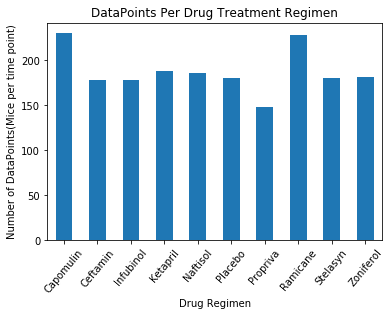

In [18]:
#BAR PLOTS
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
data_points = summary_data_df.groupby('Drug Regimen').count()['Tumor Volume (mm3)']
plot_design = pd.DataFrame(data_points)

bar_plot = plot_design.plot.bar(legend=False,rot=50)
bar_plot
plt.ylabel("Number of DataPoints(Mice per time point)")
plt.title("DataPoints Per Drug Treatment Regimen")
plt.savefig('barplot_pandas')

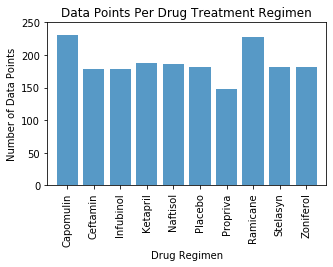

In [19]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
data_points = summary_data_df.groupby('Drug Regimen').count()['Tumor Volume (mm3)']
plot_design = pd.DataFrame(data_points)

x_axis = np.arange(len(data_points))

tick_locations = [x for x in x_axis]

plt.figure(figsize=(5,3))

plot = plot_design.reset_index()
plot

plt.bar(x_axis, plot['Tumor Volume (mm3)'], alpha=0.75, align="center")
plt.xticks(tick_locations, plot['Drug Regimen'],rotation="vertical")

plt.xlim(-0.75, len(data_points)-.25)
plt.ylim(0, 250)

plt.title("Data Points Per Drug Treatment Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")

plt.savefig('barplot_pyplot')
plt.show()

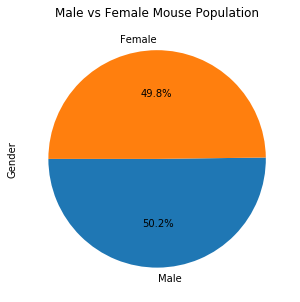

In [20]:
#PIE PLOTS
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender = mouse_metadata["Sex"].value_counts()
labels = [mouse_metadata['Sex'].unique()]
new_labels = list(gender.index)
sizes = gender

pie = gender.plot.pie(y='sizes', figsize=(5, 5), autopct="%1.1f%%",startangle=180)
plt.title('Male vs Female Mouse Population')
plt.ylabel('Gender')

plt.savefig('piechart_pandas')
plt.show()

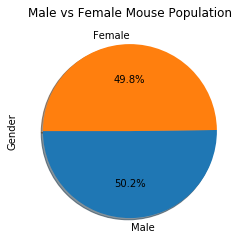

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender = mouse_metadata["Sex"].value_counts()
labels = [mouse_metadata['Sex'].unique()]
new_labels = list(gender.index)
sizes = gender
explode = (0, 0)

plt.pie(sizes, explode=explode, labels=new_labels, autopct="%1.1f%%", shadow=True, startangle=180)
plt.title('Male vs Female Mouse Population')
plt.ylabel('Gender')

plt.savefig('piechart_pyplot')
plt.show()


In [22]:
#QUARTILES, OUTLIERS AND BOXPLOTS
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
capomulin_df = combine_data_df.loc[combine_data_df["Drug Regimen"] == "Capomulin",:]
ramicane_df = combine_data_df.loc[combine_data_df["Drug Regimen"] == "Ramicane", :]
infubinol_df = combine_data_df.loc[combine_data_df["Drug Regimen"] == "Infubinol", :]
ceftamin_df = combine_data_df.loc[combine_data_df["Drug Regimen"] == "Ceftamin", :]

In [23]:
#Final tumor volume across 'Capomulin' drug regimen

capomulin = capomulin_df.groupby('Mouse ID').max()['Timepoint']
capomulinDF = pd.DataFrame(capomulin)
capomulin_merge = pd.merge(capomulinDF, combine_data_df, on=("Mouse ID","Timepoint"),how="left")

max_capomulin = capomulin_merge.loc[capomulin_merge["Timepoint"] == 45]
max_capomulin.head()


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2
5,i557,45,Capomulin,Female,1,24,47.685963,1


In [24]:
#Quartiles and Outliers Calculations for Drug Regimen 'Capomulin'

vol_capomulin = max_capomulin["Tumor Volume (mm3)"]

quartiles = vol_capomulin.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile for Capomulin is: {lowerq}")
print(f"The upper quartile for Capomulin is: {upperq}")
print(f"The interquartile range for Capomulin is: {iqr}")
print(f"The median is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Capomulin potential outliers could be below {lower_bound} and above {upper_bound}.")

The lower quartile for Capomulin is: 32.37735684
The upper quartile for Capomulin is: 40.1592203
The interquartile range for Capomulin is: 7.781863460000004
The median is: 37.31184577 
Capomulin potential outliers could be below 20.70456164999999 and above 51.83201549.


In [25]:
#Final tumor volume across 'Ramicane' drug regimen

ramicane = ramicane_df.groupby('Mouse ID').max()['Timepoint']
ramicaneDF = pd.DataFrame(ramicane)
ramicane_merge = pd.merge(ramicaneDF, combine_data_df, on=("Mouse ID","Timepoint"),how="left")

max_ramicane = ramicane_merge.loc[ramicane_merge["Timepoint"] == 45]
max_ramicane.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
5,c758,45,Ramicane,Male,9,17,33.397653,1


In [26]:
#Quartiles and Outliers Calculations for Drug Regimen 'Ramicane'

vol_ramicane = max_ramicane["Tumor Volume (mm3)"]

quartiles = vol_ramicane.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The lower quartile for Ramicane is: {lowerq}")
print(f"The upper quartile for Ramicane is: {upperq}")
print(f"The interquartile range for Ramicane is: {iqr}")
print(f"The median is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Ramicane potential outliers could be below {lower_bound} and above {upper_bound}.")

The lower quartile for Ramicane is: 30.981175224999998
The upper quartile for Ramicane is: 38.508305307499995
The interquartile range for Ramicane is: 7.527130082499998
The median is: 34.848627300000004 
Ramicane potential outliers could be below 19.690480101250003 and above 49.79900043124999.


In [27]:
#Final tumor volume across 'Infubinol' drug regimen

infubinol = infubinol_df.groupby('Mouse ID').max()['Timepoint']
infubinolDF = pd.DataFrame(infubinol)
infubinol_merge = pd.merge(infubinolDF, combine_data_df, on=("Mouse ID","Timepoint"),how="left")

max_infubinol = infubinol_merge.loc[infubinol_merge["Timepoint"] == 45]
max_infubinol.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2
7,e476,45,Infubinol,Male,23,26,62.435404,1


In [28]:
#Quartiles and Outliers Calculations for Drug Regimen 'Infubinol'

vol_infubinol = max_infubinol["Tumor Volume (mm3)"]

quartiles = vol_infubinol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The lower quartile for Infubinol is: {lowerq}")
print(f"The upper quartile for Infubinol is: {upperq}")
print(f"The interquartile range for Infubinol is: {iqr}")
print(f"The median is: {quartiles[0.5]} ")


lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Infubinol potential outliers could be below {lower_bound} and above {upper_bound}.")

The lower quartile for Infubinol is: 62.75445141
The upper quartile for Infubinol is: 67.68556862
The interquartile range for Infubinol is: 4.9311172099999965
The median is: 66.08306589 
Infubinol potential outliers could be below 55.35777559500001 and above 75.08224443499999.


In [29]:
#Final tumor volume across 'Ceftamin' drug regimen

ceftamin = ceftamin_df.groupby('Mouse ID').max()['Timepoint']
ceftaminDF = pd.DataFrame(ceftamin)
ceftamin_merge = pd.merge(ceftaminDF, combine_data_df, on=("Mouse ID","Timepoint"),how="left")

max_ceftamin = ceftamin_merge.loc[ceftamin_merge["Timepoint"] == 45]
max_ceftamin.head()


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
6,j296,45,Ceftamin,Female,24,30,61.849023,3
7,k210,45,Ceftamin,Male,15,28,68.923185,3
8,l471,45,Ceftamin,Female,7,28,67.748662,1
11,l661,45,Ceftamin,Male,18,26,59.851956,3


In [30]:
#Quartiles and Outliers Calculations for Drug Regimen 'Ceftamin'

vol_ceftamin = max_ceftamin["Tumor Volume (mm3)"]

quartiles = vol_ceftamin.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The lower quartile for Ceftamin is: {lowerq}")
print(f"The upper quartile for Ceftamin is: {upperq}")
print(f"The interquartile range for Ceftamin is: {iqr}")
print(f"The median is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Ceftamin potential outliers could be below {lower_bound} and above {upper_bound}.")


The lower quartile for Ceftamin is: 61.43389223
The upper quartile for Ceftamin is: 67.52748237
The interquartile range for Ceftamin is: 6.093590140000003
The median is: 64.29983003 
Ceftamin potential outliers could be below 52.29350701999999 and above 76.66786758.


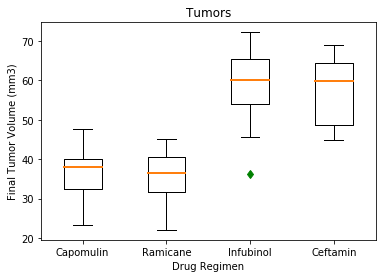

In [31]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
boxplot_capomulin = capomulin_merge["Tumor Volume (mm3)"]
boxplot_ramicane = ramicane_merge["Tumor Volume (mm3)"]
boxplot_infubinol = infubinol_merge["Tumor Volume (mm3)"]
boxplot_ceftamin = ceftamin_merge["Tumor Volume (mm3)"]

data_to_plot = [boxplot_capomulin, boxplot_ramicane, boxplot_infubinol, boxplot_ceftamin]

fig1, ax1 = plt.subplots()
ax1.set_title('Tumors')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')

ax1.boxplot(data_to_plot, labels=["Capomulin","Ramicane","Infubinol","Ceftamin"], sym='gd', medianprops={'linewidth':2})

plt.savefig('box_plot')
plt.show()

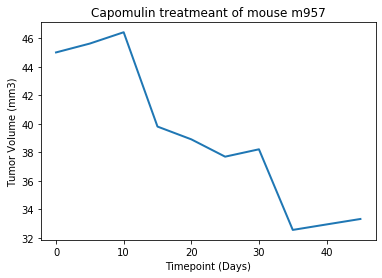

In [32]:
#LINE AND SCATTER PLOTS
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
line_plot_df = capomulin_df.loc[capomulin_df["Mouse ID"] == "m957",:]

x_axis = line_plot_df["Timepoint"]
size = line_plot_df["Tumor Volume (mm3)"]

plt.title('Capomulin treatmeant of mouse m957')
plt.plot(x_axis, size, linewidth=2, markersize=12)
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

plt.savefig('line_plot')
plt.show()


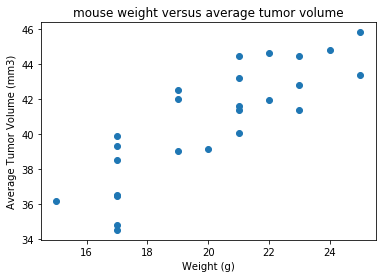

In [33]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

capolumin_average = capomulin_df.groupby(['Mouse ID']).mean()
plt.scatter(capolumin_average['Weight (g)'],capolumin_average['Tumor Volume (mm3)'])
plt.title('mouse weight versus average tumor volume')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.savefig('scatter_plot')
plt.show()


In [34]:
#CORRELATION AND REGRESSION
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
correlation=round(st.pearsonr(capolumin_average['Weight (g)'],capolumin_average['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {correlation}")


The correlation between mouse weight and average tumor volume is 0.84


In [35]:
linear_regression_model=st.linregress(capolumin_average['Weight (g)'],capolumin_average['Tumor Volume (mm3)'])
linear_regression_model

LinregressResult(slope=0.9544396890241045, intercept=21.552160532685015, rvalue=0.8419363424694718, pvalue=1.3225722434712642e-07, stderr=0.1275435903320134)

The equation of the regression line is: y = 0.95x + 21.55


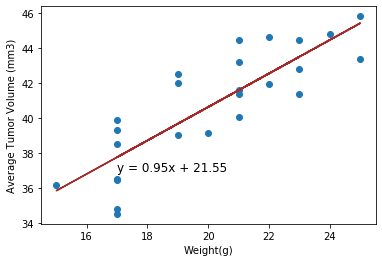

In [36]:
#Use the values of slope and intercept calculated above into the y=mx+b equation

slope=0.9544396890241045
intercept=21.552160532685015

y = capolumin_average['Weight (g)']*slope+intercept
plt.scatter(capolumin_average['Weight (g)'],capolumin_average['Tumor Volume (mm3)'])
plt.plot(capolumin_average['Weight (g)'],y,color="brown")
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumor Volume (mm3)')

line_equation = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.annotate(line_equation,(17,37),fontsize=12,color="black")

print(f"The equation of the regression line is: {line_equation}")
plt.savefig('linear_regression_model')
plt.show()